# Name: Sai Sriharsha Griddaluru
## Email: sgridda@clemson.edu
## CUID: C15358926


# HW 1: TASK 2: Gradient Norm

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def nonlinear_sine_function(X):
    return np.sin(4*X)**2 + np.sin(8*X)

# Generate X values
X = torch.linspace(-1,1,200).reshape(-1,1)

# Calculate the corresponding Y values
Y = nonlinear_sine_function(X)

In [3]:
class Model(nn.Module):
    def __init__(self, inp=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, outp=1):
        super().__init__()
        self.fc1 = nn.Linear(inp,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, outp)  

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [4]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 2000
losses = []
grad_norm_list=[]

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)

    tloss = criterion(y_pred, Y)
    losses.append(tloss)
    
    optimizer.zero_grad()
    tloss.backward()
    
    optimizer.step()
    
    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
    grad_norm_list.append(grad_norm)

In [7]:
losses = torch.tensor(losses)

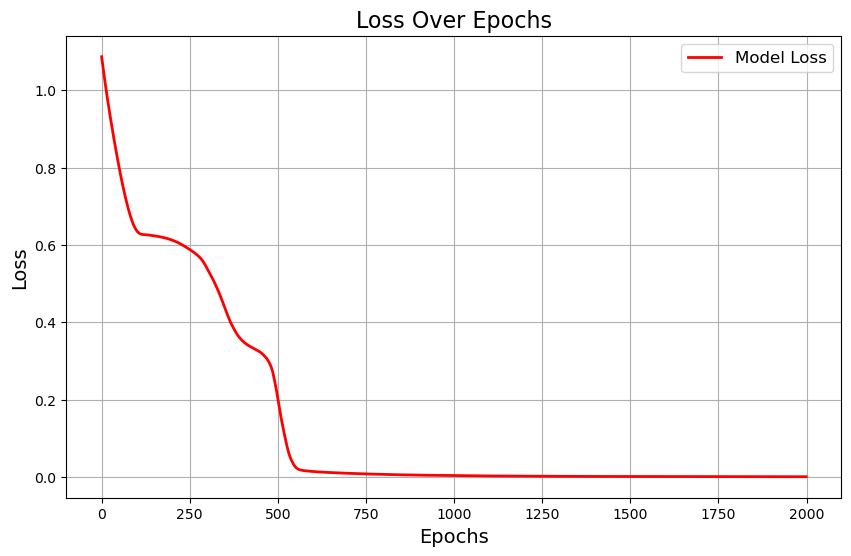

In [8]:
# Convert losses to NumPy array if it's a tensor
losses_np = losses.numpy()

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))

plt.plot(range(epochs), losses_np, color='red', linestyle='-', linewidth=2, label='Model Loss')

plt.title('Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

plt.show()


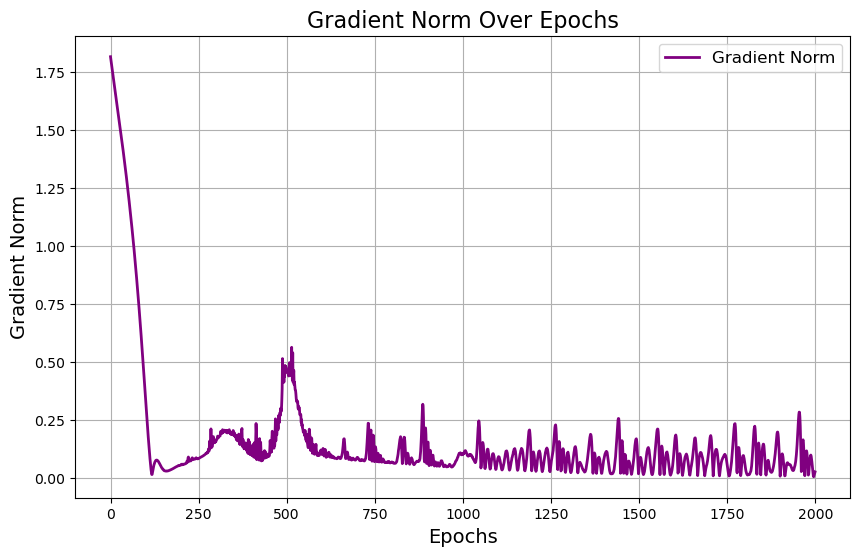

In [9]:
# Plotting the gradient norm over epochs
plt.figure(figsize=(10, 6))

plt.plot(range(epochs), grad_norm_list, color='purple', linestyle='-', linewidth=2, label='Gradient Norm')

plt.title('Gradient Norm Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Gradient Norm', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

plt.show()
